In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yahooFinance

In [2]:
spy_df = yahooFinance.Ticker("SPY").history(period="5y")
spy_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2019-09-09 00:00:00-04:00,276.484564,276.576968,274.654510,275.615753,51260300,0.0,0.0,0.0
2019-09-10 00:00:00-04:00,274.839384,275.615792,273.554671,275.551086,57947100,0.0,0.0,0.0
2019-09-11 00:00:00-04:00,275.865278,277.593648,275.199806,277.510468,68821100,0.0,0.0,0.0
2019-09-12 00:00:00-04:00,278.434732,279.553084,277.658353,278.471710,72908700,0.0,0.0,0.0
2019-09-13 00:00:00-04:00,278.924610,279.285087,277.907913,278.286865,62104800,0.0,0.0,0.0


In [3]:
class StockTicker:

    def __init__(self, df):
        self.df = df
        self.index = 0
        self.date = df.index[self.index]

    def next_day(self):
        self.index += 1
        self.date = self.df.index[self.index]

    def get_price(self):
        return self.df.loc[self.date].Close

    def get_date(self):
        return self.date

    def get_prev_price(self):
        return self.df.loc[self.index - 1].Close

    def get_next_price(self):
        return self.df.loc[self.index + 1].Close

spy_ticker = StockTicker(spy_df)

In [4]:
# have a class to hold information about holding, cash, and portfolio value
class Trader:

    def __init__(self, cash, stock_ticker, commision=0):
        self.cash = cash
        self.holdings = 0 # number of shares of SPY
        self.stock_ticker = stock_ticker
        self.commision = commision

    def __str__(self):
        return f"Cash: {self.cash}, SPY Holding: {self.holdings}"

    def portfolio_value(self):
        return self.cash + self.stock_ticker.get_price() * self.holdings

    def buy(self, amount):
        # commision is a % of the amount
        if self.cash < amount * (1 + self.commision):
            amount = self.cash / (1 + self.commision)
        price = self.stock_ticker.get_price()
        self.holdings += amount / price
        self.cash -= amount * (1 + self.commision)


In [5]:
from collections import defaultdict

START_CASH = 10000
TRADING_DAYS = 500
AMOUNT_BOUGHT_PER_DAY = 50
# trader buys $10 every day for 100 days
trader_commision = Trader(START_CASH, spy_ticker, commision=0.01)
trader_no_commision = Trader(START_CASH, spy_ticker, commision=0)

portfolio_values = defaultdict(list)

for i in range(TRADING_DAYS):
    trader_commision.buy(AMOUNT_BOUGHT_PER_DAY)
    trader_no_commision.buy(AMOUNT_BOUGHT_PER_DAY)
    portfolio_values[trader_commision].append(trader_commision.portfolio_value())
    portfolio_values[trader_no_commision].append(trader_no_commision.portfolio_value())
    print(f"Trader Commision: {trader_commision.portfolio_value()}")
    print(f"Trader No Commision: {trader_no_commision.portfolio_value()}")
    spy_ticker.next_day()


Trader Commision: 9999.5
Trader No Commision: 10000.0
Trader Commision: 9998.98826867708
Trader No Commision: 9999.98826867708
Trader Commision: 9999.19926251405
Trader No Commision: 10000.69926251405
Trader Commision: 9999.221255661289
Trader No Commision: 10001.221255661289
Trader Commision: 9998.587688279955
Trader No Commision: 10001.087688279955
Trader Commision: 9997.312169123223
Trader No Commision: 10000.312169123223
Trader Commision: 9997.572600791214
Trader No Commision: 10001.072600791214
Trader Commision: 9997.282579676643
Trader No Commision: 10001.282579676643
Trader Commision: 9996.755869188282
Trader No Commision: 10001.255869188282
Trader Commision: 9994.12370472667
Trader No Commision: 9999.12370472667
Trader Commision: 9993.506616701012
Trader No Commision: 9999.006616701012
Trader Commision: 9988.698675269514
Trader No Commision: 9994.698675269514
Trader Commision: 9991.716122407073
Trader No Commision: 9998.216122407073
Trader Commision: 9989.865778930174
Trader No

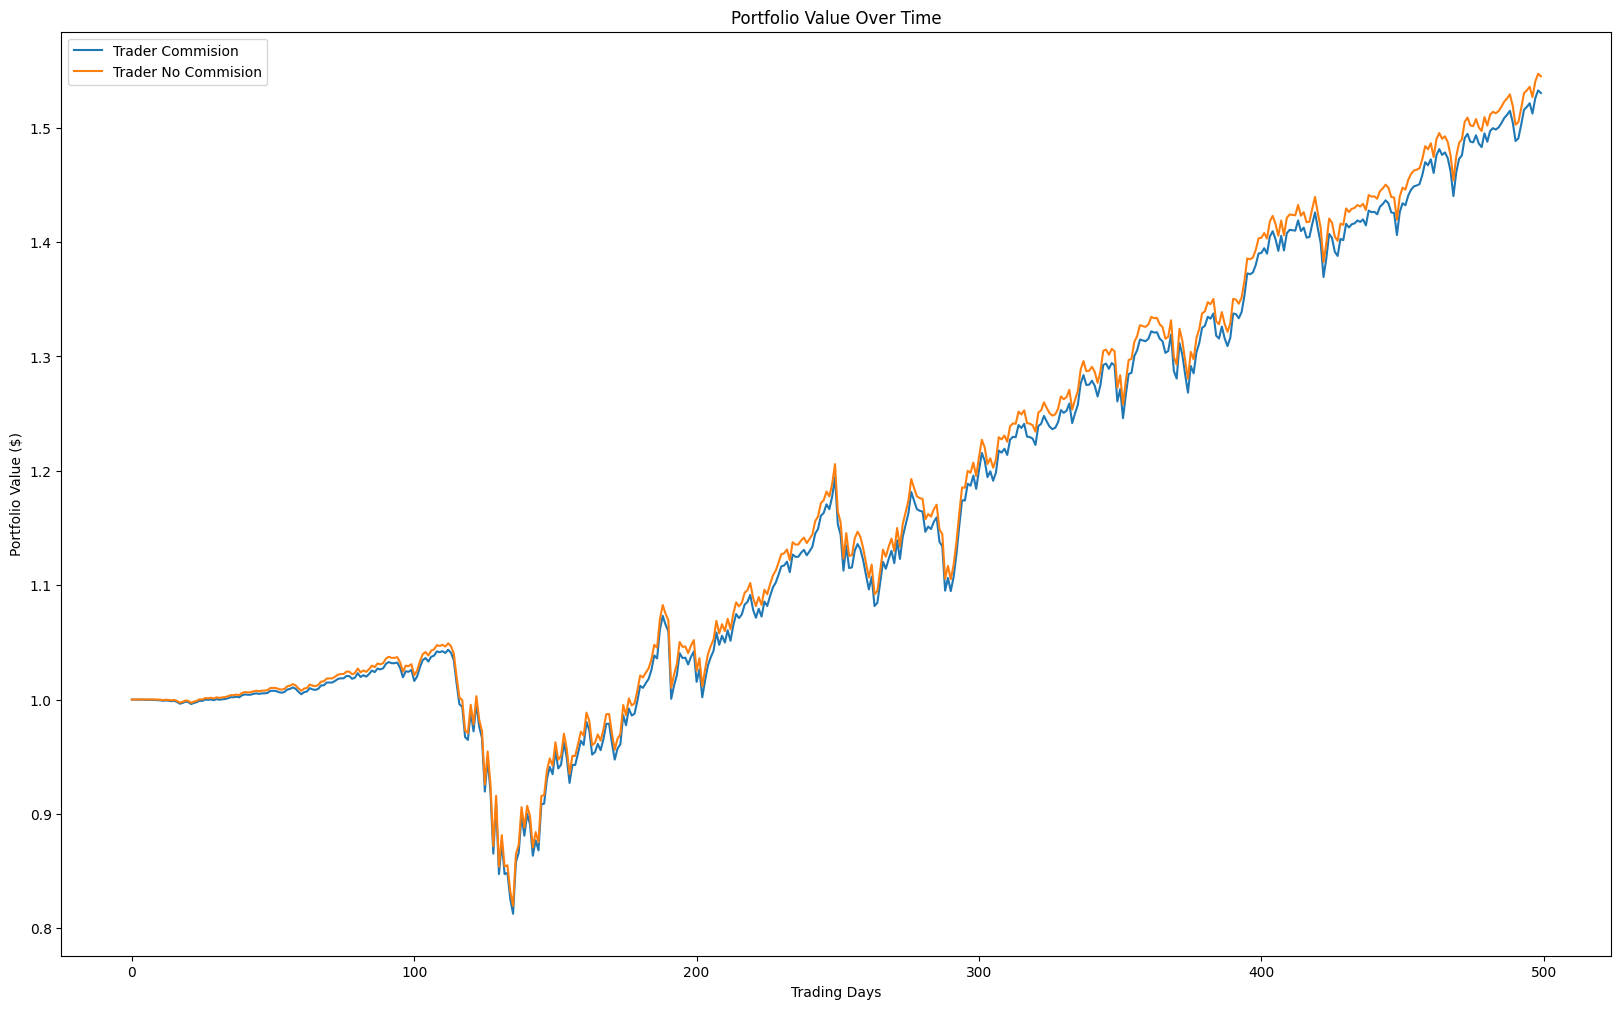

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(np.array(portfolio_values[trader_commision])/START_CASH, label="Trader Commision")
plt.plot(np.array(portfolio_values[trader_no_commision])/START_CASH, label="Trader No Commision")
plt.title("Portfolio Value Over Time")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.show()